<a href="https://colab.research.google.com/github/naot97/kaggle/blob/master/return7days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Utils**

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt


In [ ]:
def train(criterion, max_depth = 3):
    model = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, splitter= 'best', min_samples_split= 3 )
    model.fit(X, y)
    return model

def important_feature(model):
    importance = model.feature_importances_
    names = model.feature_names_in_
    # for i,v in enumerate(importance):
    #   print(f'Feature: {names[i]}, Score: {v:.5f}')
    #plot feature importance
    fig = plt.figure(figsize=(25,7))
    plt.bar([x for x in names], importance)
    plt.show()
def draw_tree(fontsize = 10):
  # summarize feature importance
  fig = plt.figure(figsize=(25,20))
  _ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   fontsize=fontsize,
                   filled=True)

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/feautres.xlsx - Sheet1.csv').drop( ['Unnamed: 0'],axis = 1)

In [ ]:
df.head()

,user_id,total_stream,total_activity,total_dlshare,total_normal_clip,total_tiktok_clip,click_email,game_id,waiting_time,hours_first_clips,hours_first_download,follower,ret_7d
0,4551,17,53,2,232,0,0,6.0,4.517130,2.419167,999999999.0,480,1
1,4552,12,21,0,30,0,0,100.0,3.642361,1.588333,999999999.0,322,0
2,4553,15,104,3,208,2,1,9.0,56.712350,7.676111,999999999.0,285,1
3,4554,20,41,5,26,0,2,9.0,44.578944,8.956111,999999999.0,51,1
4,4555,13,72,0,38,0,1,100.0,5.483889,5.199444,999999999.0,251,1


#### Engineering

In [ ]:
df.isna().sum()

user_id                   0
total_stream              0
total_activity            0
total_dlshare             0
total_normal_clip         0
total_tiktok_clip         0
click_email               0
game_id                 327
waiting_time              0
hours_first_clips         0
hours_first_download      0
follower                  0
ret_7d                    0
dtype: int64

In [ ]:
df['game_id'] = df['game_id'].fillna(100)
df.loc[df['game_id'] == 100, 'game_id'] = 0

In [ ]:
df.isna().sum()

user_id                 0
total_stream            0
total_activity          0
total_dlshare           0
total_normal_clip       0
total_tiktok_clip       0
click_email             0
game_id                 0
waiting_time            0
hours_first_clips       0
hours_first_download    0
follower                0
ret_7d                  0
dtype: int64

In [ ]:
# df['clips_per_stream'] = df['total_normal_clip'] / ( df ['total_stream'] + 0.01)
# df.loc[:,'us_game'] = 0
# df.loc[:,'sea_game'] = 0
# df.loc[df['game_id'] == 6, 'us_game'] = 1
# df.loc[df['game_id'] == 9, 'us_game'] = 1
# df.loc[df['game_id'] == 4, 'us_game'] = 1
# df.loc[df['game_id'] == 3, 'us_game'] = 1

# df.loc[df['game_id']  == 1, 'sea_game'] = 1
# df.loc[df['game_id']  == 2, 'sea_game'] = 1
# df.loc[df['game_id']  == 3, 'sea_game'] = 1
# df.loc[df['game_id']  == 7, 'sea_game'] = 1
# df.loc[df['game_id']  == 11, 'sea_game'] = 1
df.loc[:,'us_game'] = 1
df.loc[:,'sea_game'] = 1
df.loc[df['game_id'] != 6, 'us_game'] = 0
df.loc[df['game_id'] != 9, 'us_game'] = 0
df.loc[df['game_id'] != 4, 'us_game'] = 0

df.loc[df['game_id']  != 1, 'sea_game'] = 0
df.loc[df['game_id']  != 2, 'sea_game'] = 0
df.loc[df['game_id']  != 7, 'sea_game'] = 0
df.loc[df['game_id']  != 11, 'sea_game'] = 0


### **Correnlation**

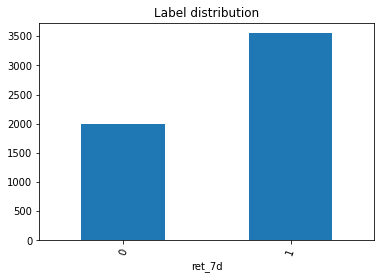

In [ ]:
df.groupby(['ret_7d']).count().user_id.plot.bar(x="Return", y="Number", rot=70, title="Label distribution");

In [ ]:
corr_maxtrix = df.corr()['ret_7d']

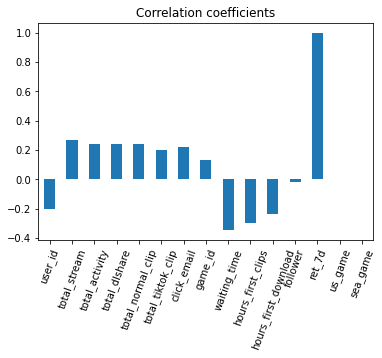

In [ ]:
corr_maxtrix.plot.bar(x="Feature", y="Score", rot=70, title="Correlation coefficients");

In [ ]:
corr_maxtrix.abs().sort_values(0, ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


ret_7d                  1.000000
waiting_time            0.348467
hours_first_clips       0.295622
total_stream            0.268305
total_dlshare           0.242086
total_normal_clip       0.241647
total_activity          0.239858
hours_first_download    0.239290
click_email             0.220206
total_tiktok_clip       0.202255
user_id                 0.200174
game_id                 0.129023
follower                0.015749
us_game                      NaN
sea_game                     NaN
Name: ret_7d, dtype: float64

In [ ]:
y = df['ret_7d'].values

X = df.drop(['ret_7d','user_id','game_id'], axis = 1)
X.shape, y.shape

((5539, 12), (5539,))

### **Decision tree**

In [ ]:
model = train('entropy', 4)

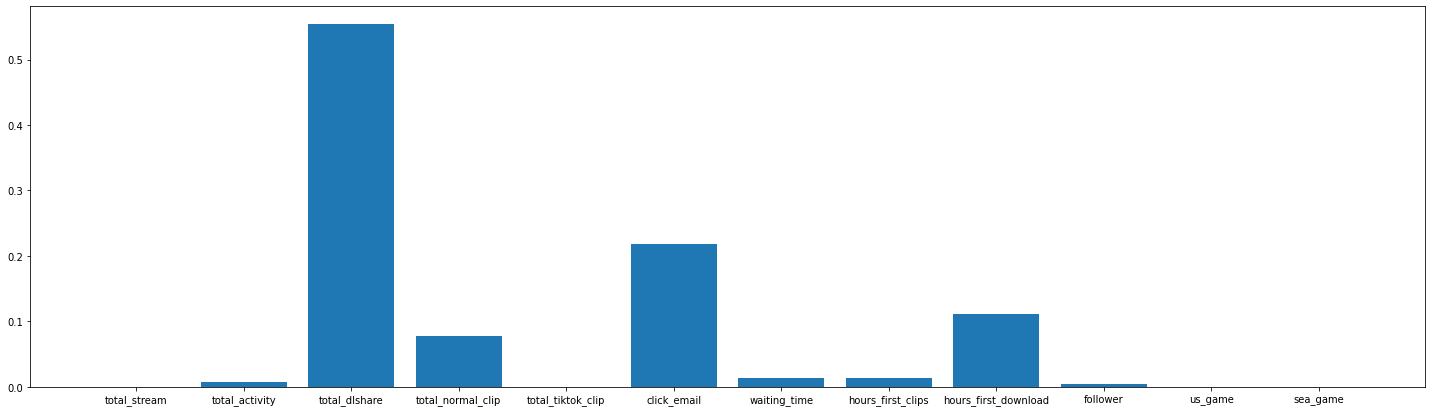

In [ ]:
important_feature(model)

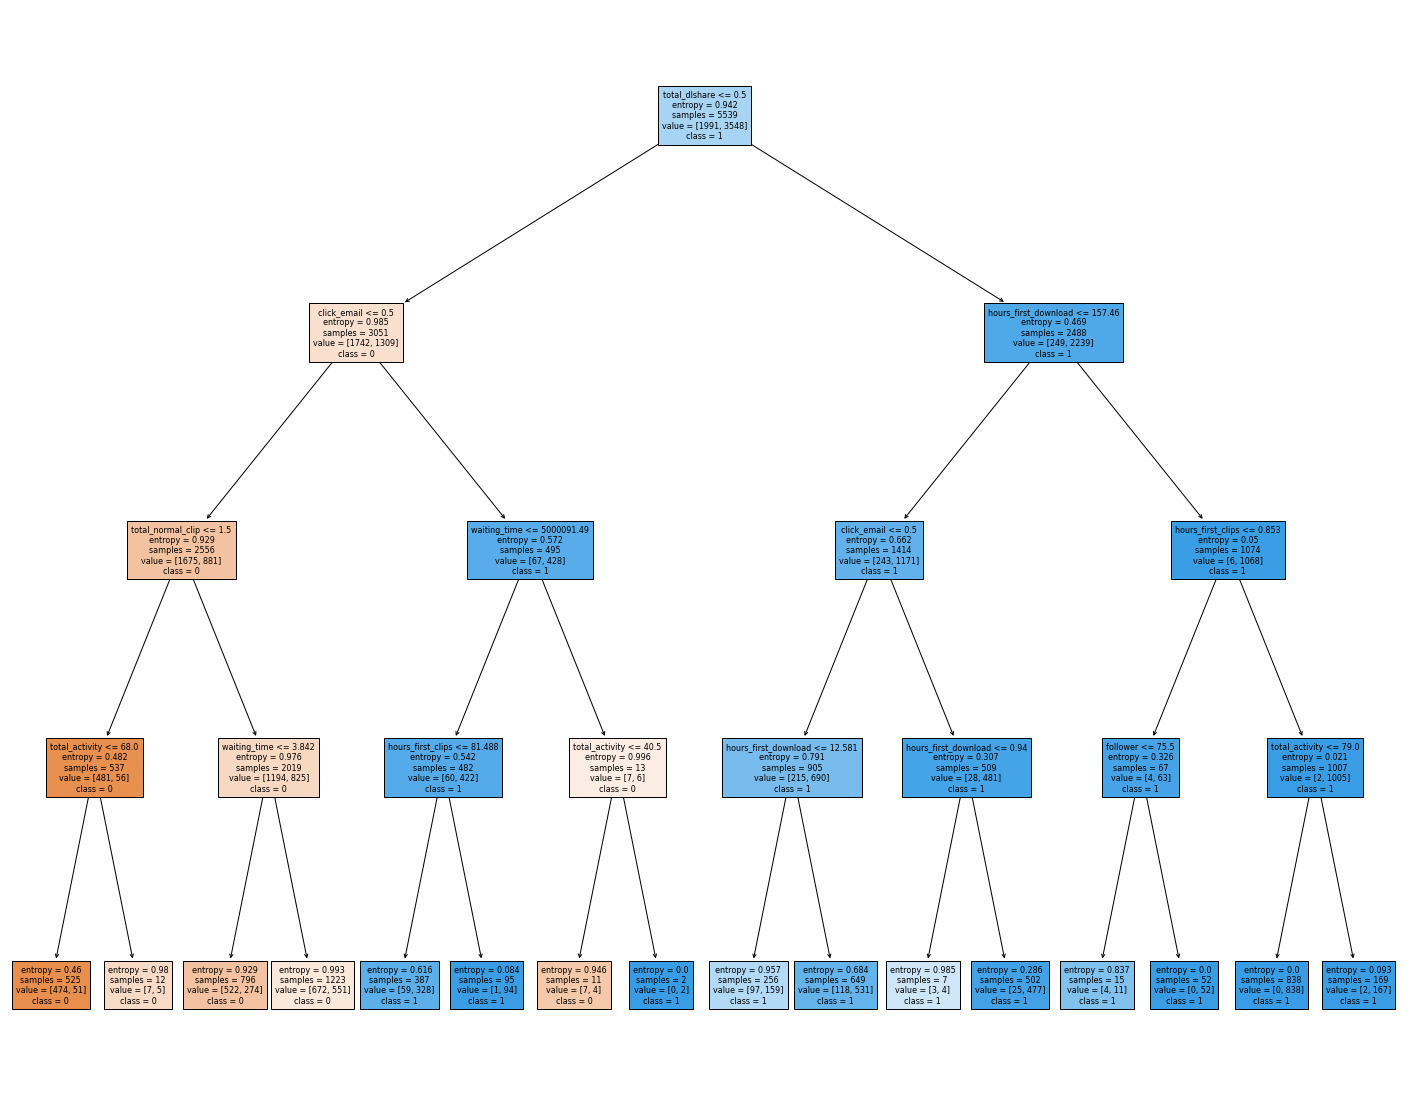

In [ ]:
draw_tree(8)